# BIZ 프로젝트 : 부실기업 예측 모형에 관한 연구

## Step3 : 모델링

할거 : 21,22(2개년도)년도 딥러닝 모델 구축

### 0. 라이브러리 및 데이터 불러오기

라이브러리 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Conv2D, MaxPooling2D, Flatten, Dropout, Reshape
from tensorflow.keras.optimizers import Adam


폰트 지정

In [2]:
import platform
from matplotlib import rc

# 운영 체제에 따라 폰트 설정
if platform.system() == 'Windows':  # Windows 환경
    rc('font', family='Malgun Gothic')  # 맑은 고딕

# 음수 표시 가능하도록 설정
plt.rcParams['axes.unicode_minus'] = False

데이터 불러오기(21 to 22 2개년도 데이터)

In [3]:
RANDOM_STATE = 110

data_21to22 = pd.read_csv("../../project/data/data_21to22.csv", encoding='utf-8-sig', low_memory=False)
print(data_21to22.shape)

(27603, 90)


### 모델링

In [4]:
# 종속 변수는 '2023/부실기업'으로 가정
y = data_21to22['2023/부실기업']
X = data_21to22.drop(columns=['2023/부실기업', '업체코드', '종목명'])

# 데이터 분할 (70:30 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, LSTM, GRU
from tensorflow.keras.optimizers import Adam

# CNN 모델 설정
cnn_model = Sequential()
cnn_model.add(Reshape((X_train_scaled.shape[1], 1, 1), input_shape=(X_train_scaled.shape[1], 1))) # 입력층
cnn_model.add(Conv2D(64, kernel_size=(2, 2), activation='relu', padding='same')) # 1번째 hidden layer
cnn_model.add(MaxPooling2D(pool_size=(1, 1))) # 2번째 hidden layer
cnn_model.add(Dropout(0.25)) # 3번째 hidden layer
cnn_model.add(Flatten()) # 4번째 hidden layer
cnn_model.add(Dense(128, activation='relu')) # 5번째 hidden layer
cnn_model.add(Dropout(0.25)) # 6번째 hidden layer
cnn_model.add(Dense(1, activation='sigmoid')) # 출력층
cnn_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# LSTM 모델 설정
lstm_model = Sequential()
lstm_model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) # 1번째 hidden layer
lstm_model.add(LSTM(128, activation='relu')) # 2번째 hidden layer
lstm_model.add(Dense(1, activation='sigmoid')) # 출력층
lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# GRU 모델 설정
gru_model = Sequential()
gru_model.add(GRU(128, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], 1))) # 1번째 hidden layer
gru_model.add(GRU(128, activation='relu')) # 2번째 hidden layer
gru_model.add(Dense(1, activation='sigmoid')) # 출력층
gru_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

CNN

In [6]:
# CNN 학습 및 평가
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1, 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1, 1))
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.2)
cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)[1]
print(f"CNN Accuracy: {cnn_accuracy}")

Epoch 1/20
484/484 [==============================] - 5s 9ms/step - loss: 0.2128 - accuracy: 0.9081 - val_loss: 0.1865 - val_accuracy: 0.9154
Epoch 2/20
484/484 [==============================] - 4s 9ms/step - loss: 0.1744 - accuracy: 0.9231 - val_loss: 0.1648 - val_accuracy: 0.9221
Epoch 3/20
484/484 [==============================] - 4s 9ms/step - loss: 0.1584 - accuracy: 0.9288 - val_loss: 0.1645 - val_accuracy: 0.9255
Epoch 4/20
484/484 [==============================] - 4s 9ms/step - loss: 0.1531 - accuracy: 0.9315 - val_loss: 0.1767 - val_accuracy: 0.9291
Epoch 5/20
484/484 [==============================] - 5s 10ms/step - loss: 0.1443 - accuracy: 0.9349 - val_loss: 0.1541 - val_accuracy: 0.9317
Epoch 6/20
484/484 [==============================] - 4s 9ms/step - loss: 0.1394 - accuracy: 0.9382 - val_loss: 0.1652 - val_accuracy: 0.9301
Epoch 7/20
484/484 [==============================] - 5s 10ms/step - loss: 0.1367 - accuracy: 0.9390 - val_loss: 0.1712 - val_accuracy: 0.9286
Epoc

LSTM

In [11]:
# LSTM 학습 및 평가
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)
lstm_accuracy = lstm_model.evaluate(X_test_lstm, y_test)[1]
print(f"LSTM Accuracy: {lstm_accuracy}")

Epoch 1/20
484/484 [==============================] - 52s 104ms/step - loss: 593620416.0000 - accuracy: 0.6818 - val_loss: 35886.7070 - val_accuracy: 0.7131
Epoch 2/20
484/484 [==============================] - 52s 107ms/step - loss: 12590.4766 - accuracy: 0.7282 - val_loss: 4063.4006 - val_accuracy: 0.7529
Epoch 3/20
484/484 [==============================] - 51s 106ms/step - loss: 6024.0161 - accuracy: 0.7192 - val_loss: 8205.3555 - val_accuracy: 0.7524
Epoch 4/20
484/484 [==============================] - 51s 105ms/step - loss: 2485.8816 - accuracy: 0.6825 - val_loss: 488.5605 - val_accuracy: 0.6706
Epoch 5/20
484/484 [==============================] - 52s 108ms/step - loss: 577.4715 - accuracy: 0.6752 - val_loss: 1282.2618 - val_accuracy: 0.7633
Epoch 6/20
484/484 [==============================] - 51s 106ms/step - loss: 758.2819 - accuracy: 0.7273 - val_loss: 261.0938 - val_accuracy: 0.6435
Epoch 7/20
484/484 [==============================] - 51s 106ms/step - loss: 497.0651 - acc

GRU

In [12]:
# GRU 학습 및 평가
gru_history = gru_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_split=0.2)
gru_accuracy = gru_model.evaluate(X_test_lstm, y_test)[1]
print(f"GRU Accuracy: {gru_accuracy}")

Epoch 1/20
484/484 [==============================] - 45s 89ms/step - loss: 0.3650 - accuracy: 0.8507 - val_loss: 0.3505 - val_accuracy: 0.8564
Epoch 2/20
484/484 [==============================] - 45s 92ms/step - loss: 0.2999 - accuracy: 0.8716 - val_loss: 0.2827 - val_accuracy: 0.8787
Epoch 3/20
484/484 [==============================] - 44s 91ms/step - loss: 0.2552 - accuracy: 0.8900 - val_loss: 0.2491 - val_accuracy: 0.8944
Epoch 4/20
484/484 [==============================] - 43s 90ms/step - loss: 0.2393 - accuracy: 0.8960 - val_loss: 0.2657 - val_accuracy: 0.8934
Epoch 5/20
484/484 [==============================] - 43s 90ms/step - loss: 0.2302 - accuracy: 0.8993 - val_loss: 0.2362 - val_accuracy: 0.8880
Epoch 6/20
484/484 [==============================] - 44s 90ms/step - loss: 0.2245 - accuracy: 0.9015 - val_loss: 0.2271 - val_accuracy: 0.8991
Epoch 7/20
484/484 [==============================] - 44s 91ms/step - loss: 0.2204 - accuracy: 0.9043 - val_loss: 0.2241 - val_accuracy:

CNN, LSTM, GRU 에폭별 정확도 시각화

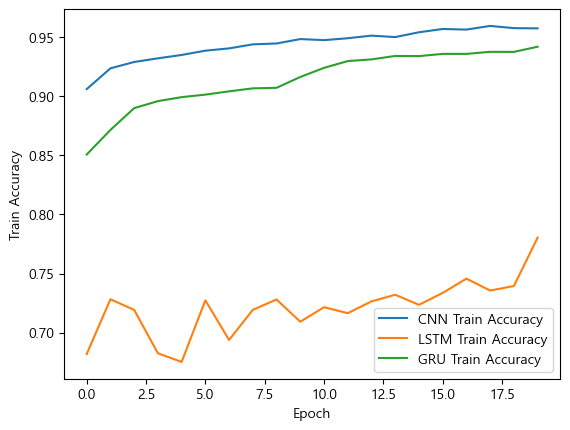

In [38]:
# 정확도 시각화
plt.plot(cnn_history.history['accuracy'], label='CNN Train Accuracy')
plt.plot(lstm_history.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Train Accuracy')
plt.legend()
plt.show()

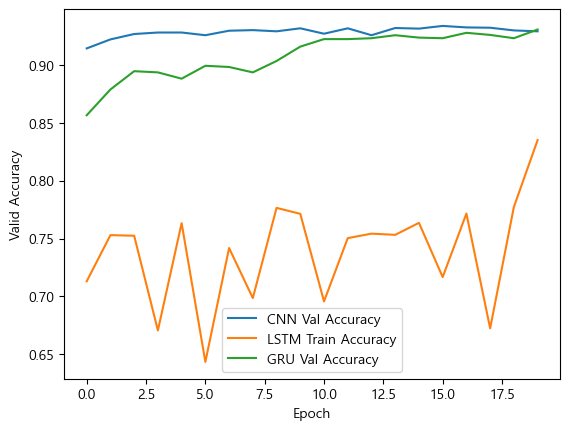

In [39]:
# 정확도 시각화
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Train Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Valid Accuracy')
plt.legend()
plt.show()

## 설명가능한? 모델? 

딥러닝 모델로 할라다가 잘 안되서 rf로 일단 한번 해봤음

### 1. SHAP

In [ ]:
# %pip install shap
# %pip install lime

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import shap
from lime.lime_tabular import LimeTabularExplainer


# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
rf_model.fit(X_train_scaled, y_train)

# 모델 평가
accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Random Forest Accuracy: {accuracy:.4f}")


Random Forest Accuracy: 0.9513


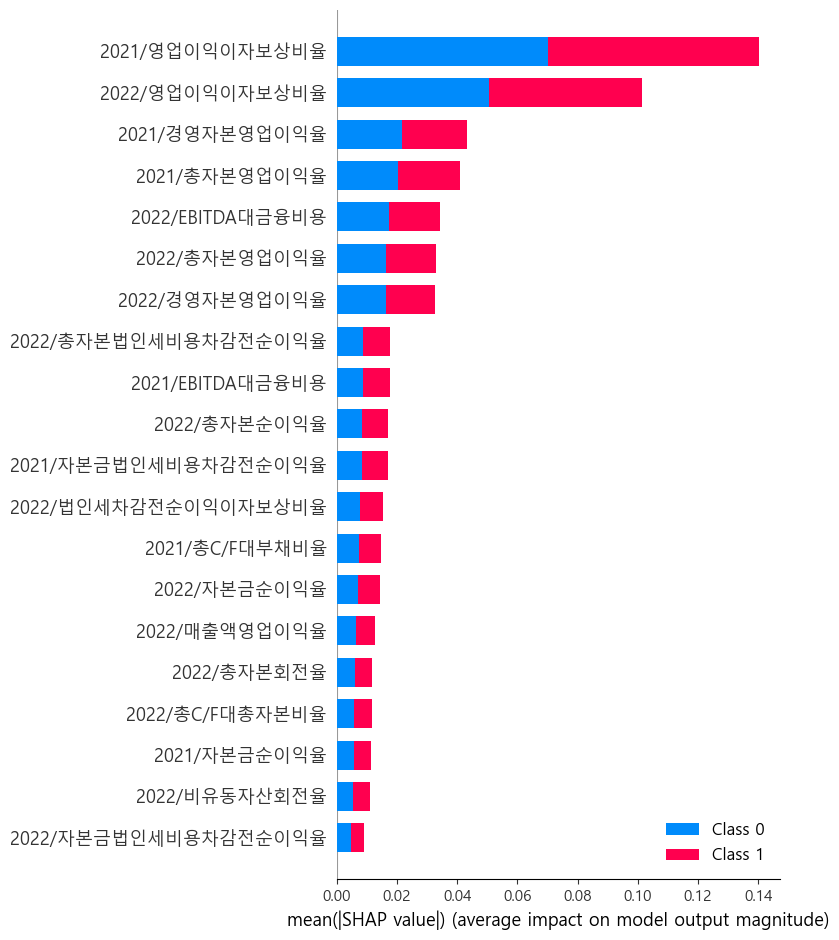

In [28]:
# SHAP 값 계산
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP 값 시각화
shap.initjs()
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)


### 2. LIME

<Figure size 6000x4000 with 0 Axes>

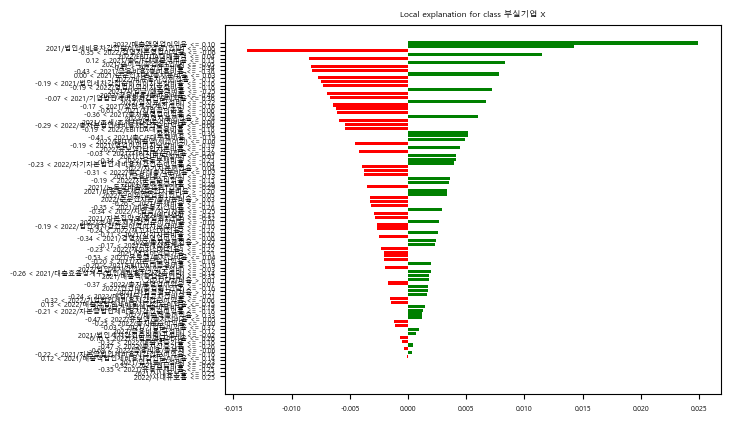

In [36]:
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# LIME 설명자 생성
lime_explainer = LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['부실기업 O', '부실기업 X'], discretize_continuous=True)

# 특정 샘플 선택 (예: 첫 번째 테스트 샘플)
sample_idx = 0
sample = X_test_scaled[sample_idx]

# LIME 설명 생성
num_features = X_test_scaled.shape[1]  # 모든 변수를 사용
lime_exp = lime_explainer.explain_instance(sample, rf_model.predict_proba, num_features=num_features)

# LIME 결과 시각화
plt.figure(figsize=(60, 40))  # 원하는 크기로 조절
plt.rcParams.update({'font.size': 5})  # 폰트 크기 조절
lime_exp.as_pyplot_figure()
plt.show()

<Figure size 3000x2000 with 0 Axes>

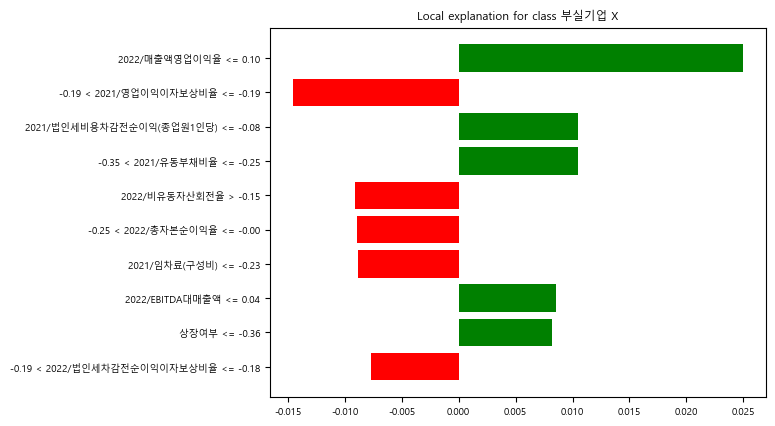

In [39]:
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# LIME 설명자 생성
lime_explainer = LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['부실기업 O', '부실기업 X'], discretize_continuous=True)

# 특정 샘플 선택 (예: 첫 번째 테스트 샘플)
sample_idx = 0
sample = X_test_scaled[sample_idx]

# LIME 설명 생성
lime_exp = lime_explainer.explain_instance(sample, rf_model.predict_proba, num_features=10)

# LIME 결과 시각화
plt.figure(figsize=(30, 20))  # 원하는 크기로 조절
plt.rcParams.update({'font.size': 7})  # 폰트 크기 조절
lime_exp.as_pyplot_figure()
plt.show()

<Figure size 1000x800 with 0 Axes>

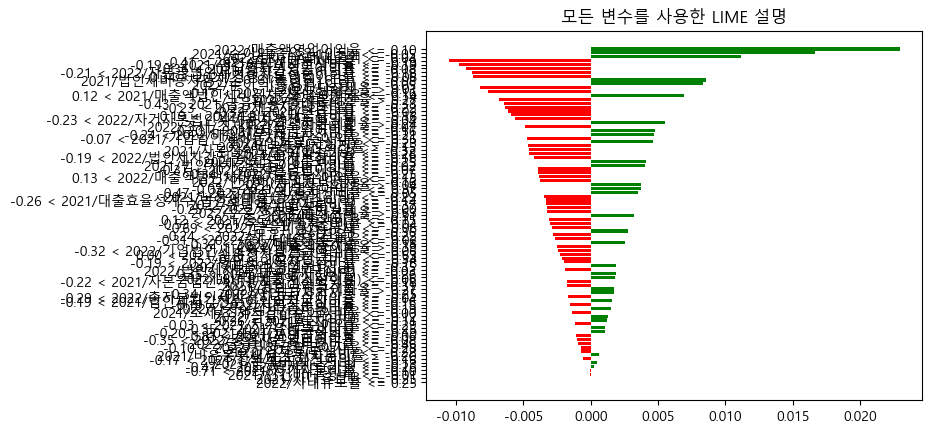

<Figure size 1000x800 with 0 Axes>

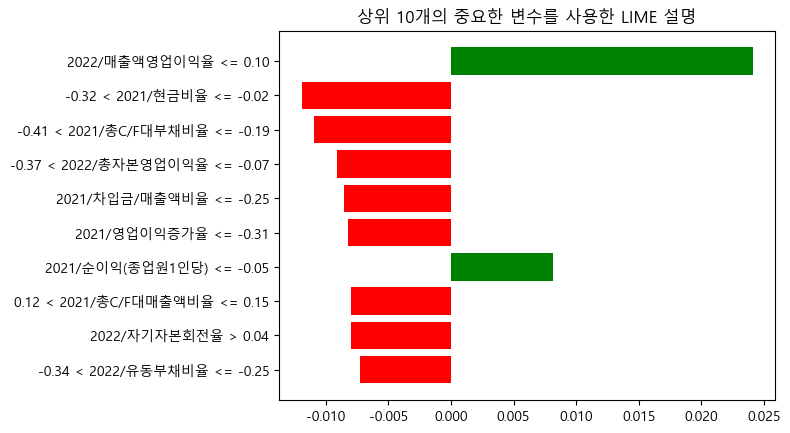

Feature: 2022/매출액영업이익율 <= 0.10, Importance: 0.024078830405928855
Feature: -0.32 < 2021/현금비율 <= -0.02, Importance: -0.011925319762561636
Feature: -0.41 < 2021/총C/F대부채비율 <= -0.19, Importance: -0.010958479590081957
Feature: -0.37 < 2022/총자본영업이익율 <= -0.07, Importance: -0.009065789529941751
Feature: 2021/차입금/매출액비율 <= -0.25, Importance: -0.008565099606132021
Feature: 2021/영업이익증가율 <= -0.31, Importance: -0.00819038355867108
Feature: 2021/순이익(종업원1인당) <= -0.05, Importance: 0.00816292791473843
Feature: 0.12 < 2021/총C/F대매출액비율 <= 0.15, Importance: -0.008005250040756152
Feature: 2022/자기자본회전율 > 0.04, Importance: -0.00797679070991955
Feature: -0.34 < 2022/유동부채비율 <= -0.25, Importance: -0.007288095630337911
이 기업이 부실기업으로 예측된 주요 이유는 다음과 같습니다:
- 2022/매출액영업이익율 <= 0.10: 0.0241
- -0.32 < 2021/현금비율 <= -0.02: -0.0119
- -0.41 < 2021/총C/F대부채비율 <= -0.19: -0.0110
- -0.37 < 2022/총자본영업이익율 <= -0.07: -0.0091
- 2021/차입금/매출액비율 <= -0.25: -0.0086
- 2021/영업이익증가율 <= -0.31: -0.0082
- 2021/순이익(종업원1인당) <= -0.05: 0.0082
- 0.12 <

In [42]:
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

# LIME 설명자 생성
lime_explainer = LimeTabularExplainer(X_train_scaled, feature_names=X.columns, class_names=['부실기업 O', '부실기업 X'], discretize_continuous=True)

# 특정 샘플 선택 (예: 첫 번째 테스트 샘플)
sample_idx = 0
sample = X_test_scaled[sample_idx]

# 모든 변수를 사용한 LIME 설명 생성
num_features_all = X_test_scaled.shape[1]  # 모든 변수를 사용
lime_exp_all = lime_explainer.explain_instance(sample, rf_model.predict_proba, num_features=num_features_all)

# 상위 10개의 중요한 변수를 사용한 LIME 설명 생성
num_features_top10 = 10  # 상위 10개의 변수를 사용
lime_exp_top10 = lime_explainer.explain_instance(sample, rf_model.predict_proba, num_features=num_features_top10)

# 모든 변수를 사용한 LIME 결과 시각화
plt.figure(figsize=(10, 8))  # 원하는 크기로 조절
plt.rcParams.update({'font.size': 10})  # 폰트 크기 조절
lime_exp_all.as_pyplot_figure()
plt.title("모든 변수를 사용한 LIME 설명")
plt.show()

# 상위 10개의 중요한 변수를 사용한 LIME 결과 시각화
plt.figure(figsize=(10, 8))  # 원하는 크기로 조절
plt.rcParams.update({'font.size': 10})  # 폰트 크기 조절
lime_exp_top10.as_pyplot_figure()
plt.title("상위 10개의 중요한 변수를 사용한 LIME 설명")
plt.show()

# LIME 설명 결과 출력
lime_exp_list = lime_exp_top10.as_list()
for feature, importance in lime_exp_list:
    print(f"Feature: {feature}, Importance: {importance}")

# 부실기업 여부에 영향을 미친 상위 10개 변수에 대한 설명 생성
explanation_text = "이 기업이 부실기업으로 예측된 주요 이유는 다음과 같습니다:\n"
for feature, importance in lime_exp_list[:10]:
    explanation_text += f"- {feature}: {importance:.4f}\n"

explanation_text += "\n이러한 수치들에 대한 대처를 진행하지 않는다면, 1년 뒤에 부실기업으로 이어질 수 있습니다."

print(explanation_text)

.